In [ ]:
import pandas as pd
import requests
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, push_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Spectral4
from bokeh.layouts import layout
import ipywidgets as widgets
from IPython.display import display

In [ ]:
# URL de la API
url = 'https://api.covidtracking.com/v1/states/daily.json'

try:
    # Enviar solicitud GET a la API
    response = requests.get(url)

    # Verificar que la solicitud fue exitosa
    response.raise_for_status()  # Lanza un HTTPError para respuestas de error

    # Intentar convertir la respuesta JSON en un DataFrame
    try:
        data = response.json()
        df = pd.DataFrame(data)
    except ValueError as e:
        print(f"Error al convertir la respuesta a JSON: {e}")

except requests.exceptions.HTTPError as http_err:
    print(f"Error HTTP ocurrido: {http_err}")

except requests.exceptions.ConnectionError as conn_err:
    print(f"Error de conexión ocurrido: {conn_err}")

except requests.exceptions.Timeout as timeout_err:
    print(f"Error de tiempo de espera ocurrido: {timeout_err}")

except requests.exceptions.RequestException as req_err:
    print(f"Error en la solicitud ocurrido: {req_err}")

except Exception as e:
    print(f"Error inesperado: {e}")


In [ ]:
df.head()

date state  positive  probableCases   negative  pending  \
0  20210307    AK   56886.0            NaN        NaN      NaN   
1  20210307    AL  499819.0       107742.0  1931711.0      NaN   
2  20210307    AR  324818.0        69092.0  2480716.0      NaN   
3  20210307    AS       0.0            NaN     2140.0      NaN   
4  20210307    AZ  826454.0        56519.0  3073010.0      NaN   

  totalTestResultsSource  totalTestResults  hospitalizedCurrently  \
0        totalTestsViral         1731628.0                   33.0   
1  totalTestsPeopleViral         2323788.0                  494.0   
2        totalTestsViral         2736442.0                  335.0   
3        totalTestsViral            2140.0                    NaN   
4        totalTestsViral         7908105.0                  963.0   

   hospitalizedCumulative  ...  dataQualityGrade  deathIncrease  \
0                  1293.0  ...              None              0   
1                 45976.0  ...              None             -1   
2                 14926.0  ...              None             22   
3                     NaN  ...              None              0   
4                 57907.0  ...              None              5   

   hospitalizedIncrease                                      hash  \
0                     0  dc4bccd4bb885349d7e94d6fed058e285d4be164   
1                     0  997207b430824ea40b8eb8506c19a93e07bc972e   
2                    11  50921aeefba3e30d31623aa495b47fb2ecc72fae   
3                     0  f77912d0b80d579fbb6202fa1a90554fc4dc1443   
4                    44  0437a7a96f4471666f775e63e86923eb5cbd8cdf   

   commercialScore negativeRegularScore negativeScore positiveScore  score  \
0                0                    0             0             0      0   
1                0                    0             0             0      0   
2                0                    0             0             0      0   
3                0                    0             0             0      0   
4                0                    0             0             0      0   

   grade  
0         
1         
2         
3         
4         

[5 rows x 56 columns]

In [ ]:
# Información general del DataFrame
df.shape

(20780, 56)

In [ ]:
# Comprobar cuántos valores nulos existen en el DataFrame
df.isnull().sum()

date                               0
state                              0
positive                         188
probableCases                  11509
negative                        7490
pending                        18642
totalTestResultsSource             0
totalTestResults                 166
hospitalizedCurrently           3441
hospitalizedCumulative          8398
inIcuCurrently                  9144
inIcuCumulative                16991
onVentilatorCurrently          11654
onVentilatorCumulative         19490
recovered                       8777
lastUpdateEt                     616
dateModified                     616
checkTimeEt                      616
death                            850
hospitalized                    8398
hospitalizedDischarged         17710
dateChecked                      616
totalTestsViral                 6264
positiveTestsViral             11822
negativeTestsViral             15756
positiveCasesViral              6534
deathConfirmed                 11358
deathProbable                  13187
totalTestEncountersViral       15549
totalTestsPeopleViral          11583
totalTestsAntibody             15991
positiveTestsAntibody          17434
negativeTestsAntibody          19322
totalTestsPeopleAntibody       18580
positiveTestsPeopleAntibody    19686
negativeTestsPeopleAntibody    19808
totalTestsPeopleAntigen        19781
positiveTestsPeopleAntigen     20147
totalTestsAntigen              17359
positiveTestsAntigen           18547
fips                               0
positiveIncrease                   0
negativeIncrease                   0
total                              0
totalTestResultsIncrease           0
posNeg                             0
dataQualityGrade               20780
deathIncrease                      0
hospitalizedIncrease               0
hash                               0
commercialScore                    0
negativeRegularScore               0
negativeScore                      0
positiveScore                      0
score                              0
grade                              0
dtype: int64

Total de columnas en el DataFrame: 56


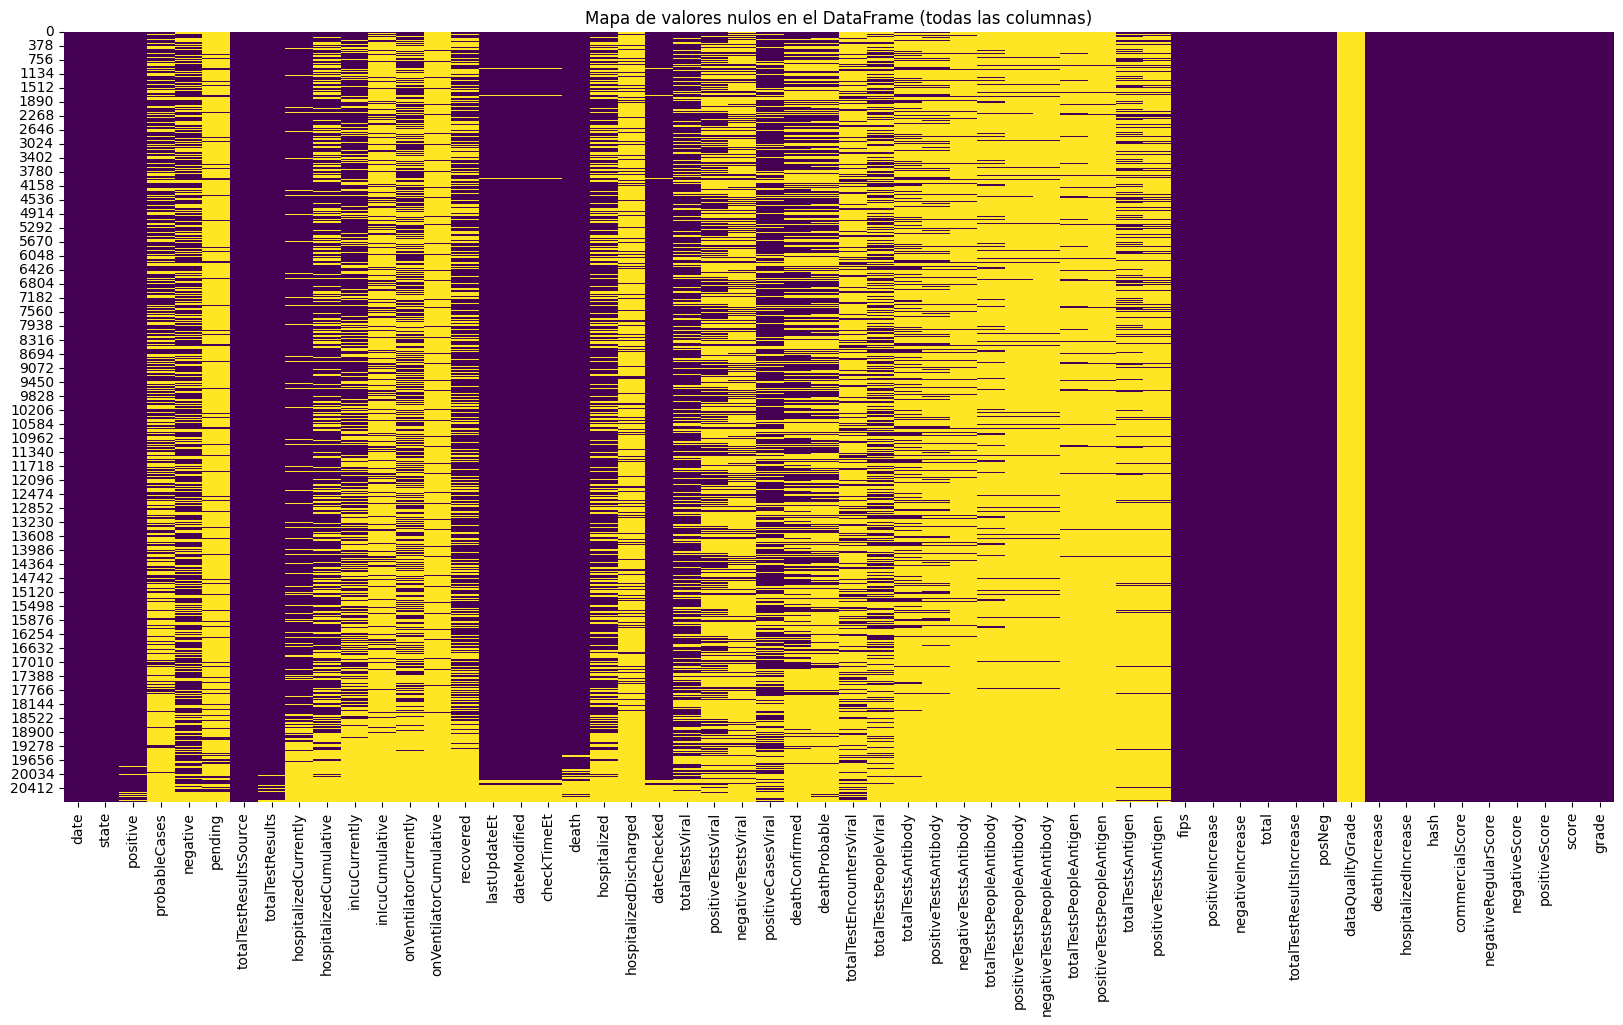

In [ ]:
# Verifica el número de columnas antes de graficar
print(f"Total de columnas en el DataFrame: {df.shape[1]}")

# Ajustar el tamaño de la figura para que quepan todas las columnas
plt.figure(figsize=(20, 10))  # Puedes ajustar el tamaño según la cantidad de columnas

# Crear el mapa de calor
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")

# Ajustar las etiquetas para que sean legibles
plt.xticks(rotation=90)  # Rotar etiquetas de columnas si es necesario
plt.yticks(rotation=0)   # Asegurar que las etiquetas de las filas estén horizontales

# Título del gráfico
plt.title("Mapa de valores nulos en el DataFrame (todas las columnas)")

# Mostrar el gráfico
plt.show()

Variables que descartamos por presentar gran cantidad de valores nulos:

1. dataQualityGrade 20.780 NaN
2. deathConfirmed 11.358 NaN
3. deathProbable 13.187 NaN
4. hospitalized 8.398 NaNN y declarada obsoleta
5. hospitalizedCumulative. 8.398 (hospitalizados alg NaN vez; número total de pers NaNs que alg NaN vez han sido hospitalizadas por COVID-19)
6. hospitalizedDischarged 17.710 NaN. (altas hospitalarias; el número total de pacientes con COVID-19 dados de alta del hospital)
7. inIcuCumulative 16.991 NaN (en UCI/Alguna vez en UCI; número total de personas que alguna vez han sido hospitalizadas en UCI)
8. inIcuCurrently 9.144 NaN (Actualmente en UCI/Ahora en UCI)
9. negativeTestsAntibody 19.322 NaN
10. negativeTestsPeopleAntibody 19.808 NaN
11. negativeTestsViral 15.756 NaN
12. onVentilatorCumulative 19.490 NaN
13. onVentilatorCurrently 11.654 NaN
14. pending 18.642 NaN
15. positiveCasesViral 6.534 NaN. Casos confirmados; número total de personas únicas con resultado positivo en una prueba de PCR u otra prueba de amplificación de ácido nucleico (NAAT) aprobada.
16. positiveTestAntobody 17.434 NaN. (Pruebas de anticuerpos positivas [muestras] Número total de pruebas de anticuerpos completadas que arrojaron resultados positivos según lo informado por el estado o territorio)
17. positiveTestAntigen 18.547 NaN
18. positiveTestsPeopleAntibody 19.686 NaN
19. positiveTestsPeopleAntigen 20.147 NaN
20. positiveTestsViral 11.822 NaN
21. probableCases 11.509 NaN
23. totalTestEncountersViral 15.549 NaN. Número total de personas a las que se les realizó la prueba de PCR por día. Si a una persona se le realiza la prueba dos veces al día en tres días diferentes, este recuento se incrementará en tres.
24. totalTestsAntibody 15.991 NaN
25. totalTestsAntigen 17.359 NaN
26. totalTestsPeopleAntibody 18.580 NaN
27. totalTestsPeopleAntigen 19.781 NaN
28. totalTestsPeopleViral 11.583 NaN





Variables que podemos descartar por resultar **irrelevantes** para este análisis del dataset, o bien por haber sido declaradas **obsoletas** (*deprecated*) por el propio equipo de ingenieros de datos:


1. checkTimeEt
2. commercialScore
3. dateChecked
4. dateModified
5. fips
6. grade
7. hash
8. lastUpdate
9. lastUpdateEt
10. negativeIncrease
11. negativeRegularScore
12. negativeScore
13. positiveScore
14. posNeg
15. score
16. total
17. totalTestResultsIncrease (El equipo de ingenieros de datos recomienda no utilizarlo a nivel de estado/territorio)
18. totalTestResultsSource

In [ ]:
# Eliminar las variables que hemos decidido descartar
# Lista de columnas a eliminar
columns_to_drop = [
    'dataQualityGrade', 'deathConfirmed', 'deathProbable', 'hospitalized',
    'hospitalizedDischarged', 'inIcuCurrently', 'negativeTestsAntibody',
    'negativeTestsPeopleAntibody', 'negativeTestsViral', 'onVentilatorCurrently',
    'pending', 'positiveCasesViral', 'positiveTestsAntibody',
    'positiveTestsAntigen', 'positiveTestsPeopleAntibody',
    'positiveTestsPeopleAntigen', 'positiveTestsViral', 'probableCases',
    'totalTestEncountersViral', 'totalTestsAntibody', 'totalTestsAntigen',
    'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
    'totalTestsPeopleViral', 'checkTimeEt', 'commercialScore',
    'dateChecked', 'dateModified', 'fips', 'grade', 'hash', 'lastUpdateEt',
    'negativeIncrease', 'negativeRegularScore',
    'negativeScore', 'positiveScore', 'posNeg', 'score', 'total',
    'totalTestResultsIncrease', 'totalTestResultsSource'
]

# Eliminar las columnas del DataFrame
df_cleaned = df.drop(columns=columns_to_drop)

# Verificar que las columnas han sido eliminadas
print("Variables del DataFrame tras el descarte: ", df_cleaned.columns)

Variables del DataFrame tras el descarte:  Index(['date', 'state', 'positive', 'negative', 'totalTestResults',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCumulative',
       'onVentilatorCumulative', 'recovered', 'death', 'totalTestsViral',
       'positiveIncrease', 'deathIncrease', 'hospitalizedIncrease'],
      dtype='object')


In [ ]:
df_cleaned.shape

(20780, 15)

Breve descripción del significado de algunas de las variables que conservamos en el DataFrame:

1. state: Abreviatura de dos letras del estado o territorio.
2.   death: Total de muertes con diagnóstico de caso confirmado o probable de COVID-19.
3.   deathIncrease: Nuevas muertes o incremento diario de muertes, calculado a partir del valor del día anterior.
4.   hospitalizedCurrently (3.441 NaN): Personas que están hospitalizadas actualmente con COVID-19.
5.   hospitalizedIncrease: Nuevas hospitalizaciones totales; incremento diario de hospitalizaciones acumulado, calculado a partir del valor del día anterior.
6. negative (7.490 NaN): Pruebas PCR negativas; número total de personas únicas con una prueba PCR completada que arroja un resultado negativo.
7. positive: Casos (confirmados más probables). Número total de casos confirmados más probables de COVID-19 informados por el estado o territorio.
8. positiveIncrease: Casos nuevos; el incremento diario de casos positivos en el campo API, que mide los casos (confirmados más probables) calculados en función del valor del día anterior. dados de alta de los hospitales, liberados del aislamiento
9. recovered	(8.777 NaN): Número total de personas que se han identificado como recuperadas de COVID-19. Incluyen los dados de alta de los hospitales, liberados del aislamiento o aquellos que no han sido identificados como víctimas fatales después de varios días (30 o más) después del inicio de la enfermedad.
10. totalTestResults	(166 NaN): En la mayoría de los estados se calcula sumando valores positivos y negativos.
11. totalTestsViral	(6.264 NaN)

In [ ]:
# Comprobar cuántos valores nulos existen en el DataFrame
df_cleaned.isnull().sum()

date                          0
state                         0
positive                    188
negative                   7490
totalTestResults            166
hospitalizedCurrently      3441
hospitalizedCumulative     8398
inIcuCumulative           16991
onVentilatorCumulative    19490
recovered                  8777
death                       850
totalTestsViral            6264
positiveIncrease              0
deathIncrease                 0
hospitalizedIncrease          0
dtype: int64

In [ ]:
# Descripción estadística del DataFrame
df_cleaned.describe()

date      positive      negative  totalTestResults  \
count  2.078000e+04  2.059200e+04  1.329000e+04      2.061400e+04   
mean   2.020244e+07  1.651560e+05  8.482246e+05      2.186936e+06   
std    3.608732e+03  3.267852e+05  1.344501e+06      4.436508e+06   
min    2.020011e+07  0.000000e+00  0.000000e+00      0.000000e+00   
25%    2.020060e+07  5.753750e+03  5.394125e+04      1.040498e+05   
50%    2.020090e+07  4.606450e+04  3.059720e+05      6.552670e+05   
75%    2.020120e+07  1.779580e+05  1.056611e+06      2.264766e+06   
max    2.021031e+07  3.501394e+06  1.018694e+07      4.964601e+07   

       hospitalizedCurrently  hospitalizedCumulative  inIcuCumulative  \
count           17339.000000            12382.000000      3789.000000   
mean             1190.576965             9262.762478      1934.191607   
std              2060.041207            12620.544081      1953.329983   
min                 0.000000                1.000000         6.000000   
25%               166.500000              985.250000       501.000000   
50%               531.000000             4472.000000      1295.000000   
75%              1279.000000            12248.500000      2451.000000   
max             22851.000000            82237.000000      9263.000000   

       onVentilatorCumulative     recovered         death  totalTestsViral  \
count             1290.000000  1.200300e+04  19930.000000     1.451600e+04   
mean               574.659690  9.424223e+04   3682.216859     2.304555e+06   
std                434.603472  2.110372e+05   6281.366321     4.445365e+06   
min                 32.000000  2.000000e+00      0.000000     0.000000e+00   
25%                220.250000  3.379000e+03    161.250000     1.324600e+05   
50%                412.000000  1.761800e+04   1108.000000     7.316510e+05   
75%                818.000000  9.315250e+04   4387.500000     2.496925e+06   
max               1533.000000  2.502609e+06  54124.000000     4.964601e+07   

       positiveIncrease  deathIncrease  hospitalizedIncrease  
count      20780.000000   20780.000000          20780.000000  
mean        1383.849519      24.790712             37.360780  
std         3023.558742      60.162742            208.237151  
min        -7757.000000    -201.000000         -12257.000000  
25%           65.000000       0.000000              0.000000  
50%          435.000000       6.000000              0.000000  
75%         1335.250000      24.000000             36.000000  
max        71734.000000    2559.000000          16373.000000

In [ ]:
# Mostrar los gráficos en el notebook
output_notebook()

# Calcular la proporción de muertes por positivos para cada estado
df_cleaned.loc[:, 'ratio'] = df_cleaned['death'] / df_cleaned['positive']

# Agrupar por estado y calcular la media de la proporción
state_ratios = df_cleaned.groupby('state')['ratio'].mean().reset_index()

# Seleccionar los 4 estados con la mayor proporción de muertes por positivos
top_states = state_ratios.nlargest(4, 'ratio')['state'].tolist()

# Filtrar los datos para los estados seleccionados
filtered_data = df_cleaned[df_cleaned['state'].isin(top_states)]

# Obtener la lista única de estados
estados_unicos = df_cleaned['state'].unique().tolist()

# Generar colores aleatorios en formato hexadecimal
def random_color():
    return "#%06x" % random.randint(0, 0xFFFFFF)

# Crear una figura de Bokeh con las dimensiones correctas
p = figure(title='Relación entre Muertes y Positivos por Estado',
           x_axis_label='Muertes',
           y_axis_label='Positivos',
           width=1400, height=1500)

# Asignar un color aleatorio a cada estado
for estado in estados_unicos:
    color = random_color()  # Generar un color aleatorio
    data = df_cleaned[df_cleaned['state'] == estado]
    source = ColumnDataSource(data)

    p.scatter('death', 'positive', size=6, source=source,
              color=color, legend_label=estado, alpha=0.7)

# Añadir la herramienta de hover para mostrar el estado
hover = HoverTool()
hover.tooltips = [
    ("Estado", "@state"),
    ("Muertes", "@death"),
    ("Positivos", "@positive")
]
p.add_tools(hover)

# Personalizar la leyenda
p.legend.title = 'Estado'
p.legend.location = 'top_right'
p.legend.click_policy = 'hide'  # Permite hacer clic en la leyenda para ocultar estados

# Mostrar la gráfica
show(p)


Este gráfico muestra la relación entre el número de muertes y el número de casos positivos por COVID-19 a lo largo del tiempo para diferentes estados. Algunas observaciones importantes:

La curva tiene una forma exponencial, lo que indica un crecimiento acelerado tanto en muertes como en casos positivos a medida que avanza la pandemia.

Cada línea de color representa un estado diferente, y se puede observar una gran variabilidad en la relación entre muertes y casos positivos entre ellos.

Algunos estados muestran una pendiente más pronunciada, lo que sugiere una tasa de mortalidad más alta en relación a los casos confirmados, mientras que otros presentan una curva más plana, indicando una menor tasa de letalidad.

La dispersión de las líneas a medida que avanzan en el tiempo refleja la diferencia en la evolución de la pandemia y en la efectividad de las medidas adoptadas por los diferentes estados para contener la propagación del virus y reducir el impacto en términos de vidas perdidas.

In [ ]:
# Mostrar los gráficos en el notebook
output_notebook()

# Calcular la proporción de recuperaciones por positivos para cada estado
df_cleaned.loc[:, 'ratio'] = df_cleaned['recovered'] / df_cleaned['positive']

# Agrupar por estado y calcular la media de la proporción
state_ratios = df_cleaned.groupby('state')['ratio'].mean().reset_index()

# Seleccionar los 4 estados con la mayor proporción de recuperaciones por positivos
top_states = state_ratios.nlargest(4, 'ratio')['state'].tolist()

# Filtrar los datos para los estados seleccionados
filtered_data = df_cleaned[df_cleaned['state'].isin(top_states)]

# Obtener la lista única de estados
estados_unicos = df_cleaned['state'].unique().tolist()

# Generar colores aleatorios en formato hexadecimal
def random_color():
    return "#%06x" % random.randint(0, 0xFFFFFF)

# Crear una figura de Bokeh con las dimensiones correctas
p = figure(title='Relación entre Recuperaciones y Positivos por Estado',
           x_axis_label='Recuperaciones',
           y_axis_label='Positivos',
           width=1400, height=1500)

# Asignar un color aleatorio a cada estado
for estado in estados_unicos:
    color = random_color()  # Generar un color aleatorio
    data = df_cleaned[df_cleaned['state'] == estado]
    source = ColumnDataSource(data)

    p.scatter('recovered', 'positive', size=6, source=source,
              color=color, legend_label=estado, alpha=0.7)

# Añadir la herramienta de hover para mostrar el estado
hover = HoverTool()
hover.tooltips = [
    ("Estado", "@state"),
    ("Recuperaciones", "@recovered"),
    ("Positivos", "@positive")
]
p.add_tools(hover)

# Personalizar la leyenda
p.legend.title = 'Estado'
p.legend.location = 'top_right'
p.legend.click_policy = 'hide'  # Permite hacer clic en la leyenda para ocultar estados

# Mostrar la gráfica
show(p)

In [ ]:
# Configura el backend para mostrar gráficos en Google Colab
%matplotlib inline

# Suponiendo que df ya está cargado y contiene las columnas necesarias
variables_interes = ['positive', 'negative', 'hospitalizedCumulative', 'hospitalizedCurrently',
                     'inIcuCumulative', 'onVentilatorCumulative', 'death']

# Filtrar el DataFrame para solo incluir estas columnas
sub_df = df_cleaned[variables_interes]

# Convertir las columnas a datos numéricos y manejar valores faltantes
sub_df = sub_df.apply(pd.to_numeric, errors='coerce')  # Convierte no numéricos a NaN
sub_df = sub_df.fillna(0)  # Reemplaza NaN con 0, o usa otro método según sea necesario

# Calcular la matriz de correlación
correlation_matrix = sub_df.corr()

# Función para actualizar el heatmap según el estado del filtro
def actualizar_heatmap(activar_filtro):
    plt.figure(figsize=(12, 10))

    if activar_filtro:
        # Aplicar un filtro para mostrar solo correlaciones significativas (ejemplo: |correlación| > 0.5)
        mask = (correlation_matrix.abs() <= 0.5)
    else:
        # No aplicar ningún filtro
        mask = None

    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt='.2f', mask=mask)
    plt.title('Matriz de Correlación (Subconjunto de Variables)')
    plt.show()

# Crear un botón para activar o desactivar el filtro
filtro_button = widgets.ToggleButton(
    value=True,
    description='Activar Filtro',
    disabled=False,
    button_style='',
    icon='check'
)

# Mostrar el botón y asociar la función a su acción
widgets.interactive(actualizar_heatmap, activar_filtro=filtro_button)

interactive(children=(ToggleButton(value=True, description='Activar Filtro', icon='check'), Output()), _dom_cl…

El análisis de correlación muestra una alta correlación entre el número de casos positivos y el número de hospitalizaciones, así como entre positivos y muertes (correlación de 0.88). Esto indica que a medida que aumentaban los casos, también lo hacía la presión sobre el sistema de salud y las tasas de mortalidad.



In [ ]:
# Activar la salida en el notebook
output_notebook()

# Convertir la columna de fecha a formato datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# Seleccionar algunos estados para la comparación
states_to_plot = ['NY', 'CA', 'TX', 'FL']

# Filtrar los datos para los estados seleccionados
filtered_data = df[df['state'].isin(states_to_plot)]

# Agrupar por estado y fecha, luego sumar los casos positivos
state_time_series = filtered_data.groupby(['state', 'date'])['positive'].sum().reset_index()

# Crear la figura en Bokeh
p = figure(x_axis_type='datetime', width=800, height=400, title='Evolución de Casos Positivos Confirmados a lo Largo del Tiempo')
p.xaxis.axis_label = 'Fecha'
p.yaxis.axis_label = 'Casos Positivos Confirmados'

# Añadir líneas y puntos para cada estado
for i, state in enumerate(states_to_plot):
    state_data = state_time_series[state_time_series['state'] == state]
    source = ColumnDataSource(state_data)
    p.line('date', 'positive', source=source, legend_label=state, color=Spectral4[i], line_width=2)

    # Usar scatter en lugar de circle
    p.scatter('date', 'positive', source=source, color=Spectral4[i], size=4)

# Añadir herramienta de hover
hover = HoverTool(
    tooltips=[
        ("Fecha", "@date{%F}"),
        ("Casos", "@positive{0,0}"),
        ("Estado", "@state")
    ],
    formatters={
        '@date': 'datetime',
        '@positive': 'numeral'
    },
    mode='vline'  # Esto hará que el hover se active cuando el cursor esté en la línea vertical
)
p.add_tools(hover)

# Configurar la leyenda
p.legend.title = 'Estado'
p.legend.location = 'top_left'

# Mostrar la gráfica interactiva
show(p)

https://es.wikipedia.org/wiki/Anexo:Estados_de_los_Estados_Unidos_por_poblaci%C3%B3n

Al correlacionar la densidad poblacional de cada estado con el número total de casos, se observa que los estados más densamente poblados, como Nueva York, tuvieron una mayor incidencia de casos, sugiriendo que la densidad poblacional fue un factor significativo en la propagación del virus.

Los estados que implementaron confinamientos estrictos temprano, como California, lograron controlar mejor la primera ola de contagios en comparación con aquellos que retrasaron estas medidas. Sin embargo, la relajación de estas restricciones eventualmente llevó a un resurgimiento de casos en la segunda mitad del año.

La reapertura económica en estados como Texas y Florida en la segunda mitad del 2020 estuvo acompañada de un incremento significativo en los casos de COVID-19. Estos estados experimentaron rebrotes importantes a medida que se levantaron las restricciones, lo que sugiere que la reapertura prematura fue un factor clave en la propagación continua del virus.


# Relación casos positivos y hospitalizados

Coeficiente de correlación: 0.41


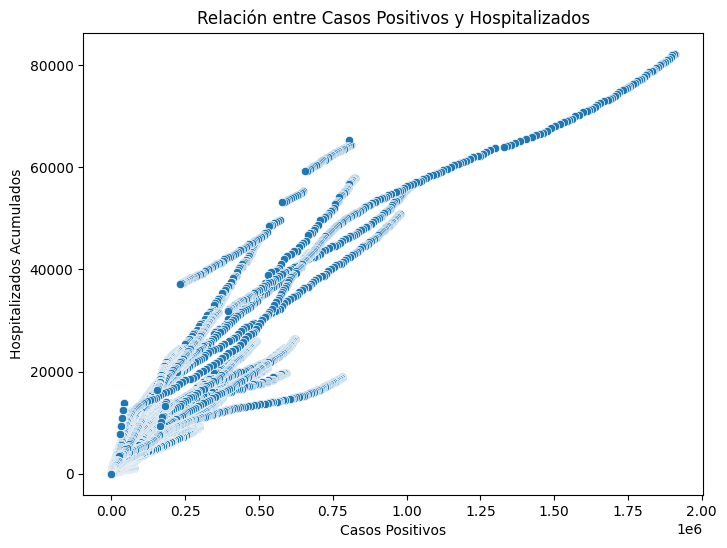

In [ ]:
# Analizar la relación entre casos positivos y hospitalizados
plt.figure(figsize=(8, 6))
sns.scatterplot(x='positive', y='hospitalizedCumulative', data=df_cleaned)
plt.xlabel('Casos Positivos')
plt.ylabel('Hospitalizados Acumulados')
plt.title('Relación entre Casos Positivos y Hospitalizados')
# Convertir las columnas a datos numéricos y manejar valores faltantes
sub_df = sub_df.apply(pd.to_numeric, errors='coerce')  # Convierte no numéricos a NaN
sub_df = sub_df.fillna(0)  # Reemplaza NaN con 0, o usa otro método según sea necesario
# Calcular el coeficiente de correlación
corr = sub_df[['positive', 'hospitalizedCumulative']].corr()
print(f"Coeficiente de correlación: {corr.iloc[0, 1]:.2f}")

Analizando la gráfica y el coeficiente de correlación que obtenido, se pueden hacer las siguientes observaciones:

Gráfica de dispersión: La gráfica muestra una tendencia positiva entre los casos positivos de COVID-19 y los pacientes hospitalizados. Es decir, a medida que aumentan los casos positivos, también aumenta el número de hospitalizaciones.
Coeficiente de correlación: El coeficiente de correlación calculado es de 0.41. Este valor indica una correlación positiva moderada entre las dos variables. Esto significa que existe una relación lineal entre ellas, pero no es una relación muy fuerte.

Un coeficiente de correlación de 0.41 se interpreta de la siguiente manera:

Rango de correlación: El coeficiente de correlación va de -1 a 1. Un valor de 0.41 se encuentra en el rango de 0.4 a 0.7, lo que se considera una correlación positiva moderada.
Fuerza de la relación: Una correlación de 0.41 indica que aproximadamente el 41% de la variación en la variable "hospitalizados" puede ser explicada por la variación en la variable "casos positivos". Esto significa que, si bien hay una relación entre ambas variables, existen otros factores que también influyen en el número de hospitalizaciones.

En resumen, la gráfica y el coeficiente de correlación indican que existe una relación positiva moderada entre los casos positivos de COVID-19 y las hospitalizaciones. Esto sugiere que, a medida que aumentan los casos positivos, también tienden a aumentar las hospitalizaciones, aunque existen otros factores que también pueden influir en este comportamiento

# Visualizaciones de mapas

## Mapa de casos positivos

El siguiente código se corresponde al que contiene el archivo casos.py que muestra una visualización de los casos de positivos de covid en los EE.UU en el rango de fechas del dataset. Para visualizarlo habría que ejecutar este comando: *bokeh serve --show casos.py*  en una terminal

In [ ]:
import pandas as pd
import geopandas as gpd
from bokeh.io import output_file, show, curdoc
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool, Slider
from bokeh.layouts import column
from bokeh.palettes import Viridis256
import json
from bokeh.models.widgets import Div

# Cargar los datos de COVID-19 desde el archivo JSON
with open('daily.json', 'r') as f:
    data = json.load(f)

# Convertir los datos a un DataFrame de pandas
df_covid = pd.DataFrame(data)

# Convertir la columna 'date' a tipo datetime para facilitar la manipulación
df_covid['date'] = pd.to_datetime(df_covid['date'], format='%Y%m%d')

# Cargar los datos geográficos de los estados de EE.UU.
states = gpd.read_file('https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json')
states['state'] = states['id']

# Obtener las fechas únicas en el dataset y ordenarlas
dates = sorted(df_covid['date'].unique())
date_strs = [date.strftime('%Y-%m-%d') for date in dates]

# Crear la función que actualiza el mapa según la fecha seleccionada
def update_plot(attr, old, new):
    date_to_plot = dates[new]
    df_covid_latest = df_covid[df_covid['date'] == date_to_plot]
    merged = states.merge(df_covid_latest, on='state', how='left')

    # Convertir columnas de fechas a cadenas antes de crear GeoJSONDataSource
    merged['date'] = merged['date'].astype(str)

    # Actualizar el rango de colores
    color_mapper.low = merged['positive'].min()
    color_mapper.high = merged['positive'].max()

    geosource.geojson = merged.to_json()
    p.title.text = f'Casos de COVID-19 por Estado en {date_to_plot.strftime("%Y-%m-%d")}'
    date_display.text = f"Fecha seleccionada: {date_to_plot.strftime('%Y-%m-%d')}"

# Crear GeoJSONDataSource inicial
df_covid_initial = df_covid[df_covid['date'] == dates[0]]
merged = states.merge(df_covid_initial, on='state', how='left')

# Convertir columnas de fechas a cadenas antes de crear GeoJSONDataSource
merged['date'] = merged['date'].astype(str)

geosource = GeoJSONDataSource(geojson=merged.to_json())

# Crear el mapa inicial
palette = Viridis256[::-1]  # Invertir la paleta para que colores más oscuros representen valores más altos
color_mapper = LinearColorMapper(palette=palette, low=merged['positive'].min(), high=merged['positive'].max())

p = figure(title=f'Casos de COVID-19 por Estado en {dates[0].strftime("%Y-%m-%d")}',
           height=600, width=950,
           toolbar_location='below', tools="pan,wheel_zoom,box_zoom,reset")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

p.patches('xs', 'ys', source=geosource,
          fill_color={'field': 'positive', 'transform': color_mapper},
          line_color='black', line_width=0.25, fill_alpha=1)

# Añadir la barra de color
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=500, height=20,
                     border_line_color=None, location=(0, 0), orientation='horizontal')
p.add_layout(color_bar, 'below')

# Configurar el hover tool
hover = HoverTool(tooltips=[('Estado', '@state'), ('Casos Positivos', '@positive')])
p.add_tools(hover)

# Crear un Slider para seleccionar la fecha
slider = Slider(title="Fecha", start=0, end=len(dates)-1, value=0, step=1)
slider.on_change('value', update_plot)

# Mostrar la fecha seleccionada en un Div
date_display = Div(text=f"Fecha seleccionada: {dates[0].strftime('%Y-%m-%d')}", width=300, height=30)

# Disponer el layout
layout = column(p, slider, date_display)

# Mostrar el mapa
curdoc().add_root(layout)
output_file("covid_casos_us_map.html")
show(layout)

## Mapa de hospitalizaciones por día

El siguiente código se corresponde al que contiene el archivo hopicurrent.py que muestra una visualización de los casos de hospitalizaciones en una fecha determinada en los EE.UU a lo largo  del rango de fechas del dataset. Para visualizarlo habría que ejecutar este comando: *bokeh serve --show hospicurrent.py*  en una terminal

In [ ]:
import pandas as pd
import geopandas as gpd
from bokeh.io import output_file, show, curdoc
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool, Slider
from bokeh.layouts import column
from bokeh.palettes import Viridis256
import json
from bokeh.models.widgets import Div

# Cargar los datos de COVID-19 desde el archivo JSON
with open('daily.json', 'r') as f:
    data = json.load(f)

# Convertir los datos a un DataFrame de pandas
df_covid = pd.DataFrame(data)

# Convertir la columna 'date' a tipo datetime para facilitar la manipulación
df_covid['date'] = pd.to_datetime(df_covid['date'], format='%Y%m%d')

# Cargar los datos geográficos de los estados de EE.UU.
states = gpd.read_file('https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json')
states['state'] = states['id']

# Obtener las fechas únicas en el dataset y ordenarlas
dates = sorted(df_covid['date'].unique())
date_strs = [date.strftime('%Y-%m-%d') for date in dates]

# Crear la función que actualiza el mapa según la fecha seleccionada
def update_plot(attr, old, new):
    date_to_plot = dates[new]
    df_covid_latest = df_covid[df_covid['date'] == date_to_plot]
    merged = states.merge(df_covid_latest, on='state', how='left')

    # Convertir columnas de fechas a cadenas antes de crear GeoJSONDataSource
    merged['date'] = merged['date'].astype(str)

    # Actualizar el rango de colores
    color_mapper.low = merged['death'].min()
    color_mapper.high = merged['death'].max()

    geosource.geojson = merged.to_json()
    p.title.text = f'Hospitalizaciones por Estado a fecha de {date_to_plot.strftime("%Y-%m-%d")}'
    date_display.text = f"Fecha seleccionada: {date_to_plot.strftime('%Y-%m-%d')}"

# Crear GeoJSONDataSource inicial
df_covid_initial = df_covid[df_covid['date'] == dates[0]]
merged = states.merge(df_covid_initial, on='state', how='left')

# Convertir columnas de fechas a cadenas antes de crear GeoJSONDataSource
merged['date'] = merged['date'].astype(str)

geosource = GeoJSONDataSource(geojson=merged.to_json())

# Crear el mapa inicial
palette = Viridis256[::-1]  # Invertir la paleta para que colores más oscuros representen valores más altos
color_mapper = LinearColorMapper(palette=palette, low=merged['hospitalizedCurrently'].min(), high=merged['hospitalizedCurrently'].max())

p = figure(title=f'Hospitalizaciones por Estado a fecha de {dates[0].strftime("%Y-%m-%d")}',
           height=600, width=950,
           toolbar_location='below', tools="pan,wheel_zoom,box_zoom,reset")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

p.patches('xs', 'ys', source=geosource,
          fill_color={'field': 'hospitalizedCurrently', 'transform': color_mapper},
          line_color='black', line_width=0.25, fill_alpha=1)

# Añadir la barra de color
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=500, height=20,
                     border_line_color=None, location=(0, 0), orientation='horizontal')
p.add_layout(color_bar, 'below')

# Configurar el hover tool
hover = HoverTool(tooltips=[('Estado', '@state'), ('Muertes', '@hospitalizedCurrently')])
p.add_tools(hover)

# Crear un Slider para seleccionar la fecha
slider = Slider(title="Fecha", start=0, end=len(dates)-1, value=0, step=1)
slider.on_change('value', update_plot)

# Mostrar la fecha seleccionada en un Div
date_display = Div(text=f"Fecha seleccionada: {dates[0].strftime('%Y-%m-%d')}", width=300, height=30)

# Disponer el layout
layout = column(p, slider, date_display)

# Mostrar el mapa
curdoc().add_root(layout)
output_file("covid_hospi_us_map.html")
show(layout)

## Mapa de muertes con diagnóstico de COVID confirmado o probable

El siguiente código se corresponde al que contiene el archivo death.py que muestra una visualización de los casos de muertes con diagnótico de COVID confirmado o probable, en los EE.UU a lo largo del rango de fechas del dataset. Para visualizarlo habría que ejecutar este comando: *bokeh serve --show death.py* en una terminal

In [ ]:
import pandas as pd
import geopandas as gpd
from bokeh.io import output_file, show, curdoc
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool, Slider
from bokeh.layouts import column
from bokeh.palettes import Viridis256
import json
from bokeh.models.widgets import Div

# Cargar los datos de COVID-19 desde el archivo JSON
with open('daily.json', 'r') as f:
    data = json.load(f)

# Convertir los datos a un DataFrame de pandas
df_covid = pd.DataFrame(data)

# Convertir la columna 'date' a tipo datetime para facilitar la manipulación
df_covid['date'] = pd.to_datetime(df_covid['date'], format='%Y%m%d')

# Cargar los datos geográficos de los estados de EE.UU.
states = gpd.read_file('https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json')
states['state'] = states['id']

# Obtener las fechas únicas en el dataset y ordenarlas
dates = sorted(df_covid['date'].unique())
date_strs = [date.strftime('%Y-%m-%d') for date in dates]

# Crear la función que actualiza el mapa según la fecha seleccionada
def update_plot(attr, old, new):
    date_to_plot = dates[new]
    df_covid_latest = df_covid[df_covid['date'] == date_to_plot]
    merged = states.merge(df_covid_latest, on='state', how='left')

    # Convertir columnas de fechas a cadenas antes de crear GeoJSONDataSource
    merged['date'] = merged['date'].astype(str)

    # Actualizar el rango de colores
    color_mapper.low = merged['death'].min()
    color_mapper.high = merged['death'].max()

    geosource.geojson = merged.to_json()
    p.title.text = f'Muertes de COVID-19 por Estado en {date_to_plot.strftime("%Y-%m-%d")}'
    date_display.text = f"Fecha seleccionada: {date_to_plot.strftime('%Y-%m-%d')}"

# Crear GeoJSONDataSource inicial
df_covid_initial = df_covid[df_covid['date'] == dates[0]]
merged = states.merge(df_covid_initial, on='state', how='left')

# Convertir columnas de fechas a cadenas antes de crear GeoJSONDataSource
merged['date'] = merged['date'].astype(str)

geosource = GeoJSONDataSource(geojson=merged.to_json())

# Crear el mapa inicial
palette = Viridis256[::-1]  # Invertir la paleta para que colores más oscuros representen valores más altos
color_mapper = LinearColorMapper(palette=palette, low=merged['death'].min(), high=merged['death'].max())

p = figure(title=f'Muertes de COVID-19 por Estado en {dates[0].strftime("%Y-%m-%d")}',
           height=600, width=950,
           toolbar_location='below', tools="pan,wheel_zoom,box_zoom,reset")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

p.patches('xs', 'ys', source=geosource,
          fill_color={'field': 'death', 'transform': color_mapper},
          line_color='black', line_width=0.25, fill_alpha=1)

# Añadir la barra de color
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=500, height=20,
                     border_line_color=None, location=(0, 0), orientation='horizontal')
p.add_layout(color_bar, 'below')

# Configurar el hover tool
hover = HoverTool(tooltips=[('Estado', '@state'), ('Muertes', '@death')])
p.add_tools(hover)

# Crear un Slider para seleccionar la fecha
slider = Slider(title="Fecha", start=0, end=len(dates)-1, value=0, step=1)
slider.on_change('value', update_plot)

# Mostrar la fecha seleccionada en un Div
date_display = Div(text=f"Fecha seleccionada: {dates[0].strftime('%Y-%m-%d')}", width=300, height=30)

# Disponer el layout
layout = column(p, slider, date_display)

# Mostrar el mapa
curdoc().add_root(layout)
output_file("covid_death_us_map.html")
show(layout)

## Mapa de nuevas muertes

El siguiente código se corresponde al que contiene el archivo deathincrease.py que muestra una visualización de los casos de nuevas muertes con diagnótico de COVID confirmado o probable, en los EE.UU a lo largo del rango de fechas del dataset. Para visualizarlo habría que ejecutar este comando: *bokeh serve --show deathincrease.py* en una terminal

In [ ]:
import pandas as pd
import geopandas as gpd
from bokeh.io import output_file, show, curdoc
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool, Slider
from bokeh.layouts import column
from bokeh.palettes import Viridis256
import json
from bokeh.models.widgets import Div

# Cargar los datos de COVID-19 desde el archivo JSON
with open('daily.json', 'r') as f:
    data = json.load(f)

# Convertir los datos a un DataFrame de pandas
df_covid = pd.DataFrame(data)

# Convertir la columna 'date' a tipo datetime para facilitar la manipulación
df_covid['date'] = pd.to_datetime(df_covid['date'], format='%Y%m%d')

# Cargar los datos geográficos de los estados de EE.UU.
states = gpd.read_file('https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json')
states['state'] = states['id']

# Obtener las fechas únicas en el dataset y ordenarlas
dates = sorted(df_covid['date'].unique())
date_strs = [date.strftime('%Y-%m-%d') for date in dates]

# Crear la función que actualiza el mapa según la fecha seleccionada
def update_plot(attr, old, new):
    date_to_plot = dates[new]
    df_covid_latest = df_covid[df_covid['date'] == date_to_plot]
    merged = states.merge(df_covid_latest, on='state', how='left')

    # Convertir columnas de fechas a cadenas antes de crear GeoJSONDataSource
    merged['date'] = merged['date'].astype(str)

    # Actualizar el rango de colores
    color_mapper.low = merged['deathIncrease'].min()
    color_mapper.high = merged['deathIncrease'].max()

    geosource.geojson = merged.to_json()
    p.title.text = f'Incremento de muertes de COVID-19 por Estado en {date_to_plot.strftime("%Y-%m-%d")}'
    date_display.text = f"Fecha seleccionada: {date_to_plot.strftime('%Y-%m-%d')}"

# Crear GeoJSONDataSource inicial
df_covid_initial = df_covid[df_covid['date'] == dates[0]]
merged = states.merge(df_covid_initial, on='state', how='left')

# Convertir columnas de fechas a cadenas antes de crear GeoJSONDataSource
merged['date'] = merged['date'].astype(str)

geosource = GeoJSONDataSource(geojson=merged.to_json())

# Crear el mapa inicial
palette = Viridis256[::-1]  # Invertir la paleta para que colores más oscuros representen valores más altos
color_mapper = LinearColorMapper(palette=palette, low=merged['deathIncrease'].min(), high=merged['deathIncrease'].max())

p = figure(title=f'Incremento de muertes de COVID-19 por Estado en {dates[0].strftime("%Y-%m-%d")}',
           height=600, width=950,
           toolbar_location='below', tools="pan,wheel_zoom,box_zoom,reset")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

p.patches('xs', 'ys', source=geosource,
          fill_color={'field': 'deathIncrease', 'transform': color_mapper},
          line_color='black', line_width=0.25, fill_alpha=1)

# Añadir la barra de color
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=500, height=20,
                     border_line_color=None, location=(0, 0), orientation='horizontal')
p.add_layout(color_bar, 'below')

# Configurar el hover tool
hover = HoverTool(tooltips=[('Estado', '@state'), ('Incremento de muertes', '@deathIncrease')])
p.add_tools(hover)

# Crear un Slider para seleccionar la fecha
slider = Slider(title="Fecha", start=0, end=len(dates)-1, value=0, step=1)
slider.on_change('value', update_plot)

# Mostrar la fecha seleccionada en un Div
date_display = Div(text=f"Fecha seleccionada: {dates[0].strftime('%Y-%m-%d')}", width=300, height=30)

# Disponer el layout
layout = column(p, slider, date_display)

# Mostrar el mapa
curdoc().add_root(layout)
output_file("covid_deadincrease_us_map.html")
show(layout)

## Visualización conjunta de los cuatro cuadros

El siguiente código se corresponde al que contiene el archivo combined_bokeh_script.py que muestra las cuatro visualizaciones mencionadas anteriormente (casos positivos, hospitalizaciones en una fecha determinada, muertes con diagnóstivo por covid confirmado o probable y las nuevas muertes registradas por día). Para visualizarlo habría que ejecutar este comando: *bokeh serve --show combined_bokeh_script.py* en una terminal

In [ ]:
import pandas as pd
import geopandas as gpd
from bokeh.io import curdoc
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool, Slider, Div
from bokeh.layouts import column, row, gridplot
from bokeh.palettes import Viridis256
import json

# Cargar los datos de COVID-19 desde el archivo JSON
with open('daily.json', 'r') as f:
    data = json.load(f)

# Convertir los datos a un DataFrame de pandas
df_covid = pd.DataFrame(data)

# Convertir la columna 'date' a tipo datetime para facilitar la manipulación
df_covid['date'] = pd.to_datetime(df_covid['date'], format='%Y%m%d')

# Cargar los datos geográficos de los estados de EE.UU.
states = gpd.read_file('https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json')
states['state'] = states['id']

# Obtener las fechas únicas en el dataset y ordenarlas
dates = sorted(df_covid['date'].unique())

# Crear GeoJSONDataSource inicial
def create_geosource(date):
    df_covid_date = df_covid[df_covid['date'] == date]
    merged = states.merge(df_covid_date, on='state', how='left')
    merged['date'] = merged['date'].astype(str)
    return GeoJSONDataSource(geojson=merged.to_json())

# Crear el mapa inicial para cada métrica
def create_plot(column_name, title):
    geosource = create_geosource(dates[0])

    palette = Viridis256[::-1]  # Invertir la paleta para que colores más oscuros representen valores más altos
    color_mapper = LinearColorMapper(palette=palette, low=df_covid[column_name].min(), high=df_covid[column_name].max())

    p = figure(title=f'{title} en {dates[0].strftime("%Y-%m-%d")}',
               height=400, width=400,
               toolbar_location='below', tools="pan,wheel_zoom,box_zoom,reset")

    # Añadir leyendas a los ejes X e Y
    p.xaxis.axis_label = "Longitud"
    p.yaxis.axis_label = "Latitud"

    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None

    p.patches('xs', 'ys', source=geosource,
              fill_color={'field': column_name, 'transform': color_mapper},
              line_color='black', line_width=0.25, fill_alpha=1)

    color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=500, height=20,
                         border_line_color=None, location=(0, 0), orientation='horizontal')
    p.add_layout(color_bar, 'below')

    hover = HoverTool(tooltips=[('Estado', '@state'), (title, f'@{column_name}')])
    p.add_tools(hover)

    return p, geosource, color_mapper

# Función que actualiza el mapa según la fecha seleccionada
def update_plot(attr, old, new):
    date_to_plot = dates[new]

    for p, geosource, color_mapper, column_name in plots:
        df_covid_latest = df_covid[df_covid['date'] == date_to_plot]
        merged = states.merge(df_covid_latest, on='state', how='left')
        merged['date'] = merged['date'].astype(str)

        color_mapper.low = merged[column_name].min()
        color_mapper.high = merged[column_name].max()

        geosource.geojson = merged.to_json()
        p.title.text = f'{column_name.replace("_", " ").title()} en {date_to_plot.strftime("%Y-%m-%d")}'

    date_display.text = f"Fecha seleccionada: {date_to_plot.strftime('%Y-%m-%d')}"

# Crear gráficos y almacenar referencias para actualizar
plots = []

for col_name, title in [('death', 'Muertes por COVID-19'),
                        ('deathIncrease', 'Incremento de muertes por COVID-19'),
                        ('hospitalizedCurrently', 'Hospitalizaciones actuales por COVID-19'),
                        ('positive', 'Positivos')]:

    p, geosource, color_mapper = create_plot(col_name, title)
    plots.append((p, geosource, color_mapper, col_name))

# Crear un Slider para seleccionar la fecha
slider = Slider(title="Fecha", start=0, end=len(dates)-1, value=0, step=1)
slider.on_change('value', update_plot)

# Mostrar la fecha seleccionada en un Div
date_display = Div(text=f"Fecha seleccionada: {dates[0].strftime('%Y-%m-%d')}", width=300, height=30)

# Layout en una matriz de 2x2
grid = gridplot([[plots[0][0], plots[1][0]], [plots[2][0], plots[3][0]]])

layout = column(Div(text="<h1>COVID-19 Visualizaciones conjuntas</h1>"), slider, date_display, grid)

# Añadir al documento
curdoc().add_root(layout)
curdoc().title = "COVID-19 Visualizaciones"